In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In this notebook , we work on mnist dataset ,as its size is smaller and its more feasible to train in case no gpu power available .

In [3]:
(X_train ,_) ,(X_test,_) = keras.datasets.mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

In [5]:
X_train.shape

(60000, 28, 28)

Here are some training set images.

<Figure size 432x288 with 0 Axes>

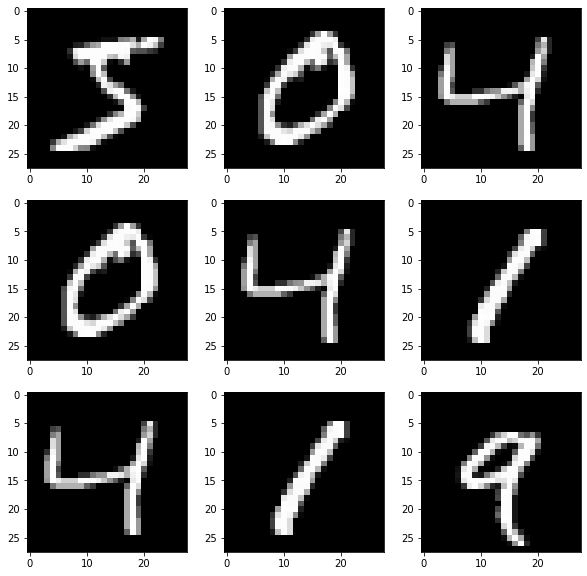

In [6]:
plt.gray()
fig , k = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i in range(3) :
    for j in range(3) :
        k[i][j].imshow(X_train[i+j])

In [7]:
X_train.shape

(60000, 28, 28)

Preparing data for training

In [8]:
X_train_noisy ,X_test_noisy = (X_train + np.random.normal(loc = 50 ,scale = 20 ,size = X_train.shape))/255 , (X_test + np.random.normal(loc = 50 ,scale = 20 ,size = X_test.shape))/255

In [9]:
X_train_noisy_new ,X_train_new , X_test_noisy_new,X_test_new= tf.expand_dims(X_train_noisy ,axis =-1) , tf.expand_dims(X_train ,axis =-1)/255 ,tf.expand_dims(X_test_noisy ,axis =-1),tf.expand_dims(X_test ,axis =-1)/255

The autoencoder has 2 parts decoder and encoder . First we start designing the encoder part .

In [10]:
input = keras.layers.Input(shape = (28,28,1))
hidden_1 = keras.layers.Conv2D(filters = 16 , kernel_size = (3,3) ,activation = keras.activations.relu , padding ='same')(input)
pool_1 = keras.layers.MaxPool2D(pool_size =(2,2) , padding ='same')(hidden_1)
hidden_2 = keras.layers.Conv2D(filters = 8 , kernel_size = (3,3) ,activation = keras.activations.relu , padding ='same')(pool_1)
pool_2 = keras.layers.MaxPool2D(pool_size =(2,2) , padding ='same')(hidden_2)

Next --> Onto the decoder part

In [11]:
hidden_4 = keras.layers.Conv2D(filters =8 , kernel_size = (3,3) ,activation = keras.activations.relu , padding ='same' )(pool_2)
up_1 = keras.layers.UpSampling2D((2,2))(hidden_4)
hidden_5 = keras.layers.Conv2D(filters =16 , kernel_size = (3,3) ,activation = keras.activations.relu , padding ='same' )(up_1)
up_2 = keras.layers.UpSampling2D((2,2))(hidden_5)
output_1 = keras.layers.Conv2D(filters = 1 , kernel_size =(3,3),activation = 'sigmoid',padding ='same')(up_2)

In [12]:
Autoencoder = keras.models.Model(input , output_1)
Autoencoder.compile(optimizer = 'adagrad' , loss = 'binary_crossentropy')

In [13]:
Autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0     

Finally we trrain our autoencoder

In [14]:
Autoencoder.fit(X_train_new, X_train_new,epochs=50,batch_size=128,shuffle=True,validation_data=(X_test_new, X_test_new))

Epoch 1/50
469/469 [==============================] - 8s 11ms/step - loss: 0.6551 - val_loss: 0.6114
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.5474 - val_loss: 0.4985
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.4699 - val_loss: 0.4469
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.4096 - val_loss: 0.3729
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.3396 - val_loss: 0.3144
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2935 - val_loss: 0.2781
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2630 - val_loss: 0.2508
Epoch 8/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2387 - val_loss: 0.2291
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2216 - val_loss: 0.2152
Epoch 10/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2104 - val_lo

Checking performance from some examles

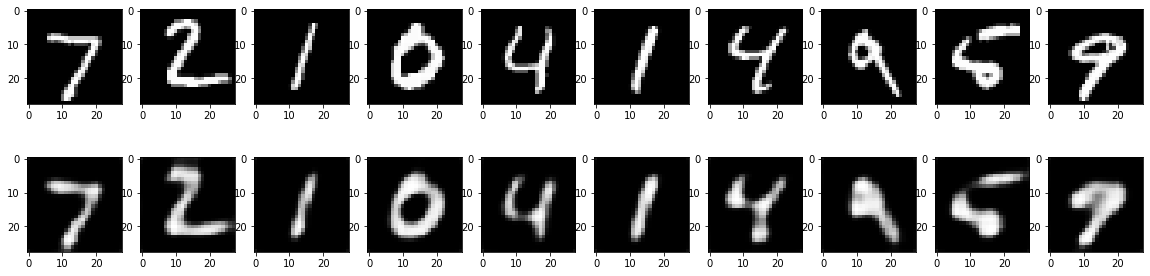

In [15]:
fig,ax = plt.subplots(2,10)
fig.set_size_inches(20,5)
for i in range(ax.shape[1]):
    ax[0][i].imshow(X_test_new[i]*255)
    ax[1][i].imshow(Autoencoder.predict(np.array([X_test_new[i]]))[0]*255)

Lets check some noisy dataset

<Figure size 432x288 with 0 Axes>

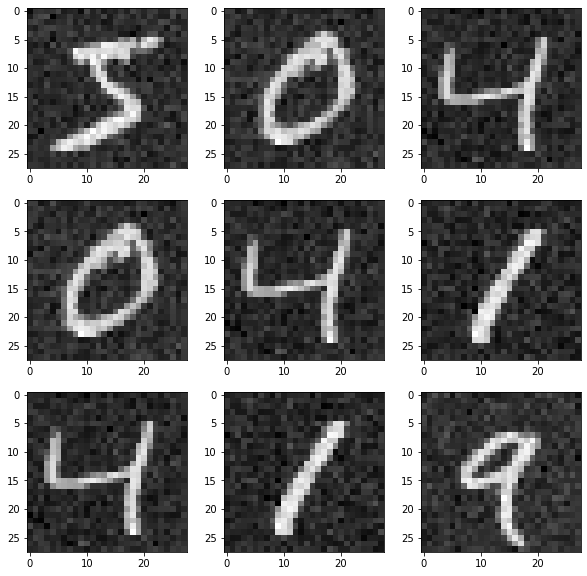

In [16]:
plt.gray()
fig , k = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i in range(3) :
    for j in range(3) :
        k[i][j].imshow(X_train_noisy[i+j])

Next we see how to design a denoising autoencoder from the previously designed and trained autoencoder

In [17]:
Noise_reduce = keras.models.Model(input , output_1)

In [20]:
Noise_reduce.compile(optimizer ='adagrad' ,loss ="binary_crossentropy")

In [18]:
X_train_noisy_new.shape ,X_train_new.shape , X_test_noisy_new.shape,X_test_new.shape

(TensorShape([60000, 28, 28, 1]),
 TensorShape([60000, 28, 28, 1]),
 TensorShape([10000, 28, 28, 1]),
 TensorShape([10000, 28, 28, 1]))

In [21]:
Noise_reduce.fit(X_train_noisy_new ,X_train_new , epochs =100 ,validation_split = 0.05 ,batch_size =256 ,shuffle =True)

Epoch 1/100
223/223 [==============================] - 5s 20ms/step - loss: 0.1360 - val_loss: 0.1330
Epoch 2/100
223/223 [==============================] - 4s 17ms/step - loss: 0.1280 - val_loss: 0.1297
Epoch 3/100
223/223 [==============================] - 4s 17ms/step - loss: 0.1258 - val_loss: 0.1282
Epoch 4/100
223/223 [==============================] - 4s 18ms/step - loss: 0.1246 - val_loss: 0.1272
Epoch 5/100
223/223 [==============================] - 4s 17ms/step - loss: 0.1237 - val_loss: 0.1264
Epoch 6/100
223/223 [==============================] - 4s 17ms/step - loss: 0.1230 - val_loss: 0.1257
Epoch 7/100
223/223 [==============================] - 4s 17ms/step - loss: 0.1224 - val_loss: 0.1250
Epoch 8/100
223/223 [==============================] - 4s 18ms/step - loss: 0.1218 - val_loss: 0.1245
Epoch 9/100
223/223 [==============================] - 4s 17ms/step - loss: 0.1212 - val_loss: 0.1239
Epoch 10/100
223/223 [==============================] - 4s 17ms/step - loss: 0.120

223/223 [==============================] - 5s 20ms/step - loss: 0.1052 - val_loss: 0.1080
Epoch 81/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1051 - val_loss: 0.1079
Epoch 82/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1050 - val_loss: 0.1078
Epoch 83/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1048 - val_loss: 0.1077
Epoch 84/100
223/223 [==============================] - 4s 20ms/step - loss: 0.1047 - val_loss: 0.1075
Epoch 85/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1046 - val_loss: 0.1074
Epoch 86/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1045 - val_loss: 0.1073
Epoch 87/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1044 - val_loss: 0.1072
Epoch 88/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1042 - val_loss: 0.1071
Epoch 89/100
223/223 [==============================] - 4s 19ms/step - loss: 0.1041 - 

Checking performance using some examples

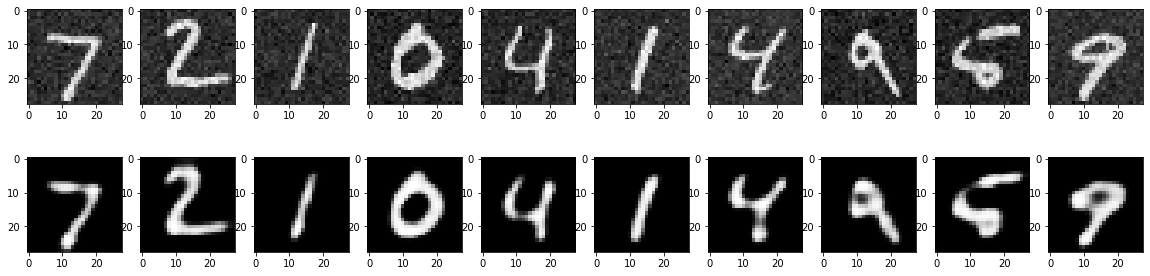

In [22]:
fig,ax = plt.subplots(2,10)
fig.set_size_inches(20,5)
for i in range(ax.shape[1]):
    ax[0][i].imshow(X_test_noisy_new[i]*255)
    ax[1][i].imshow(Noise_reduce.predict(np.array([X_test_noisy_new[i]]))[0]*255)